In [60]:
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

def printSeries(dataframe):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(dataframe)

def fillWithMean(dataframe, columnName):
    dataframe[columnName].fillna(train_titanic[columnName].mean(), inplace=True)
    
def fillWithMode(dataframe, columnName):
    dataframe[columnName].fillna(dataframe[columnName].mode()[0], inplace = True)

Reading the data

In [61]:
train_titanic = pd.read_csv("../input/titanic/train.csv")
test_titanic = pd.read_csv("../input/titanic/test.csv")


train_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Cleaning data

In [63]:
fillWithMean(train_titanic, 'Age')
fillWithMean(test_titanic, 'Age')

fillWithMode(train_titanic, 'Embarked')
fillWithMode(test_titanic, 'Embarked')

fillWithMode(train_titanic, 'Cabin')
fillWithMode(test_titanic, 'Cabin')

fillWithMode(test_titanic, 'Fare')

def label_sex(row):
    return 1 if row["Sex"] == "female" else 0


train_titanic["IsFemale"] = train_titanic.apply(lambda row: label_sex(row), axis=1)
test_titanic["IsFemale"] = train_titanic.apply(lambda row: label_sex(row), axis=1)

In [64]:
train_titanic.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
IsFemale       0
dtype: int64

Inspect Dataset

/home/torsho/kaggle_notebooks/env/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


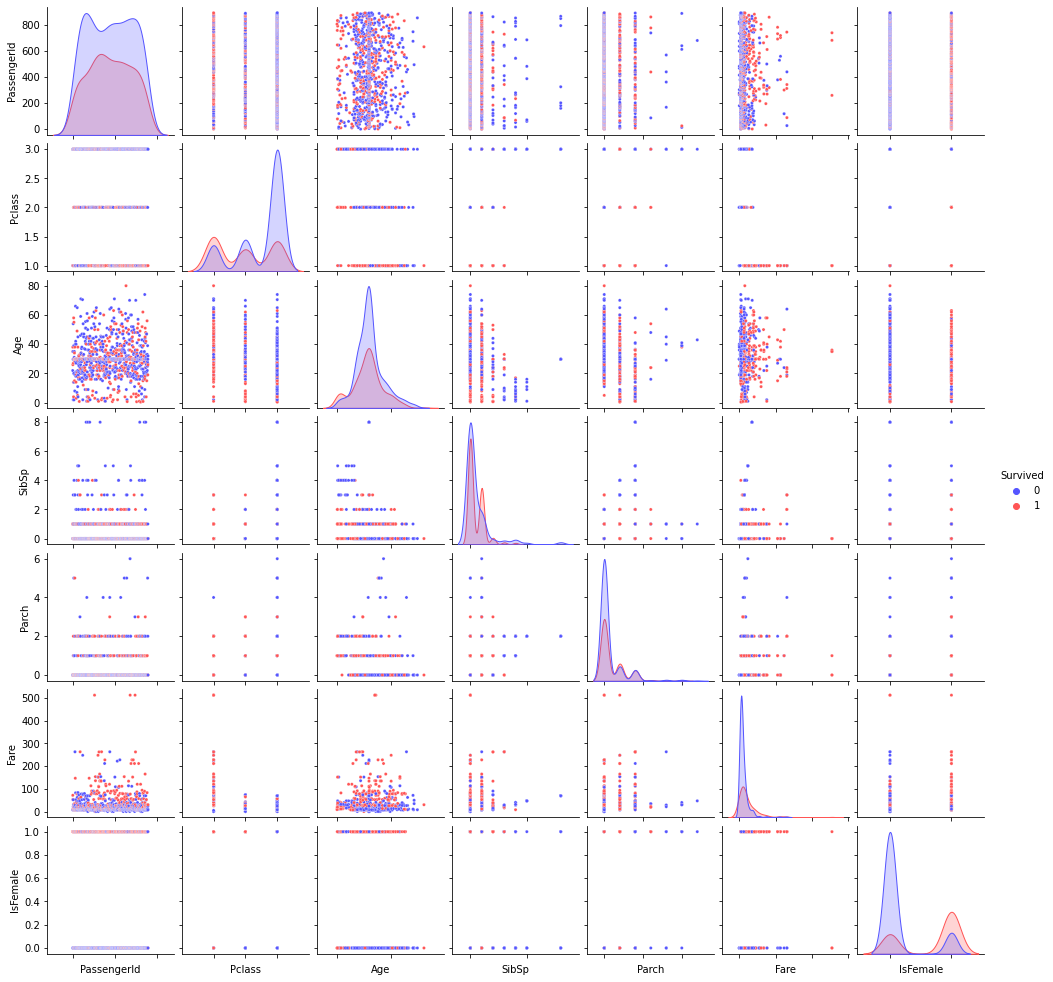

In [65]:
g = sns.pairplot(data=train_titanic, hue='Survived', palette = 'seismic',
                 size=2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])


Finding out standard correlation coefficient:


array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='IsFemale', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='IsFemale', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='IsFemale', ylabel='Age'>],
       [<AxesSubplot:xlabel='Survived', ylabel='IsFemale'>,
        <AxesSubplot:xlabel='Pclass', ylabel='IsFemale'>,
        <AxesSubplot:xlabel='Age', ylabel='IsFemale'>,
        <AxesSubplot:xlabel='IsFemale', ylabel='IsFemale'>]], dtype=object)

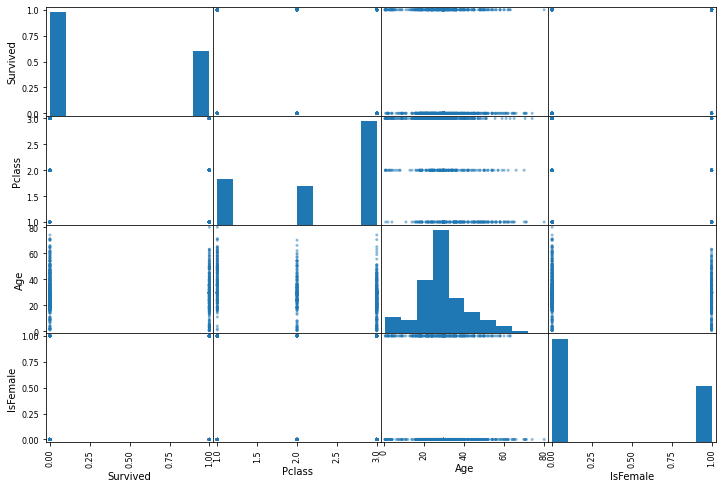

In [66]:
corr_matrix = train_titanic.corr()
corr_matrix["Survived"].sort_values(ascending=False)

attributes = ["Survived", "Pclass", "Age", "IsFemale"]
scatter_matrix(train_titanic[attributes], figsize=(12, 8))

Drop unnecessary columns

In [67]:
train_titanic.drop(['Sex','Embarked','Name','Ticket', 'Cabin', 'PassengerId'], errors='ignore', axis=1, inplace=True)
test_passenger_ids = test_titanic['PassengerId']
test_titanic.drop(['Sex','Embarked','Name','Ticket', 'Cabin', 'PassengerId'], errors='ignore', axis=1, inplace=True)

train_titanic.head()
# test_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,IsFemale
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X = train_titanic.drop('Survived', axis=1)
y = train_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

Get Predictions


In [69]:
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [83]:
predictions = logmodel.predict(test_titanic)

pd.concat([test_passenger_ids, pd.Series(predictions)], axis=1).to_csv('../output/titanic.csv', index=False)

